In [ ]:
# Credit for parts a and b go to josephlee94

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
image_labels=["airpalne","automoble","bird","cat","deer","dog","frog","horse","ship","truck"]

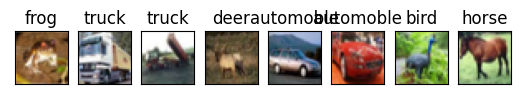

In [5]:
images=8
fig,ax=plt.subplots(1,images)
for img in range(images):
    ax[img].imshow(x_train[img])
    ax[img].set_title(image_labels[y_train[img][0]])
    ax[img].set_xticks([]);ax[img].set_yticks([])
plt.show()

In [6]:
import keras

In [7]:
y_train_oh=keras.utils.to_categorical(y_train,len(image_labels))
y_test_oh=keras.utils.to_categorical(y_test,len(image_labels))

C:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


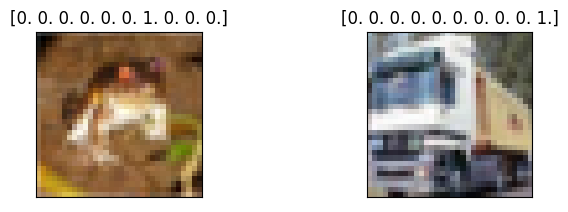

In [8]:
images=2
fig,ax=plt.subplots(1,images)
for img in range(images):
    ax[img].imshow(x_train[img])
    ax[img].set_title(y_train_oh[img])
    ax[img].set_xticks([]);ax[img].set_yticks([])
plt.subplots_adjust(wspace=1)    
plt.show()

In [9]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [14]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=model.fit(x_train,y_train_oh,batch_size=32,epochs=3,validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 309s 247ms/step - loss: 1.3456 - accuracy: 0.5129 - val_loss: 1.1191 - val_accuracy: 0.6065
Epoch 2/3
1250/1250 [==============================] - 313s 250ms/step - loss: 1.0959 - accuracy: 0.6081 - val_loss: 0.9456 - val_accuracy: 0.6653
Epoch 3/3
1234/1250 [============================>.] - ETA: 3s - loss: 0.9644 - accuracy: 0.6561

In [ ]:
fig,ax=plt.subplots(1,2)
ax[0].plot(history.history["loss"],label="train")
ax[0].plot(history.history["val_loss"],label="val")
ax[0].set_title("model loss")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()
ax[1].plot(history.history["accuracy"],label="train")
ax[1].plot(history.history["val_accuracy"],label="val")
ax[1].set_title("model accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("accuracy")
ax[1].legend()
plt.subplots_adjust(wspace=0.5)
plt.show()